In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

%matplotlib inline

In [2]:
data = pd.read_csv("2019-Nov.csv")
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
data.shape

(67501979, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### Know your Customers

How many customers visit the site?

In [6]:
visitor = data['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 3696117


### Vistors Daily Trend

Does traffic flunctuate by date?

In [59]:
data['event_date'] = data['event_time'].apply(lambda s: str(s)[0:10])
#data.head()

visitor_by_date = data[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by=['event_date'], ascending=True)
#visitor_by_date

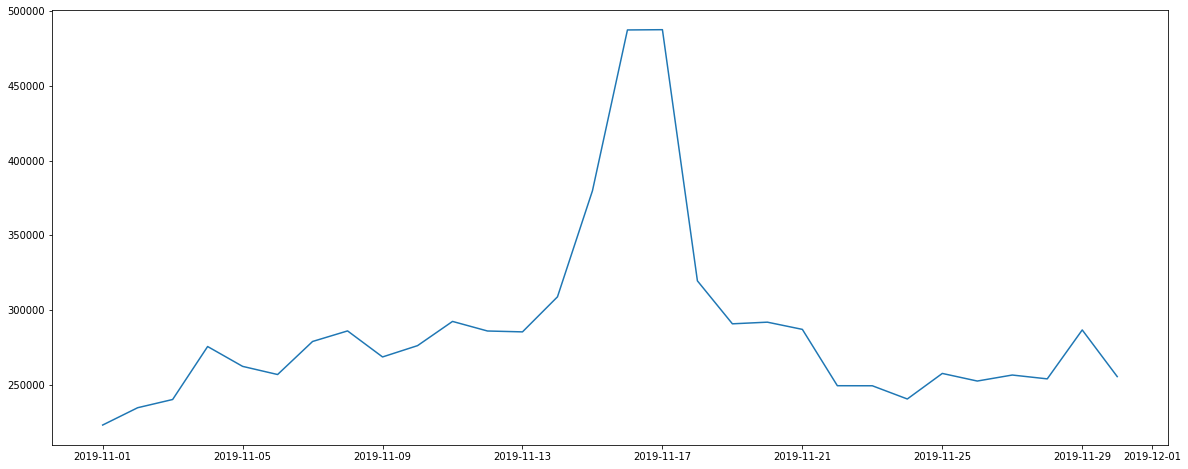

<Figure size 1440x576 with 0 Axes>

In [60]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()
plt.savefig('Vistors_Daily_Trend.png')

### By Category and Product 

Which category customers interact the most? What brand the view to most?

In [61]:
top_category = data['category_code'].value_counts()[:5].sort_values(ascending=False)
top_category.index.array

<PandasArray>
['electronics.smartphone',   'electronics.video.tv',     'computers.notebook',
     'electronics.clocks',          'apparel.shoes']
Length: 5, dtype: object

In [62]:
df_top_category = data.loc[data['category_code'].isin(top_category.index.array),:]
top_brand = df_top_category.groupby(['category_code','brand'])['user_session'].agg(['count']).sort_values(['category_code','count'], ascending=False)
top_brand.head(30)

count
category_code        brand            
electronics.video.tv samsung    771041
                     lg         351790
                     artel      311139
                     haier      127990
                     sony       123282
                     kivi        84220
                     tcl         81246
                     yasin       67876
                     xiaomi      40062
                     philips     35777
                     changhong   28155
                     toshiba     24186
                     harper      18821
                     arg         18815
                     shivaki     17431
                     ergo        12115
                     horizont    11436
                     elenberg    10206
                     blaupunkt    9995
                     vestel       8807
                     hisense      8235
                     irbis        7856
                     rebus        6588
                     bq           5126
                     jvc          3267
                     saturn       2669
                     dauscher     1963
                     dexp         1797
                     olto         1605
                     panasonic     896

### Purchase Behavior

What's the distribution of eventype?

In [64]:
data['event_type'].value_counts()

view        63556110
cart         3028930
purchase      916939
Name: event_type, dtype: int64

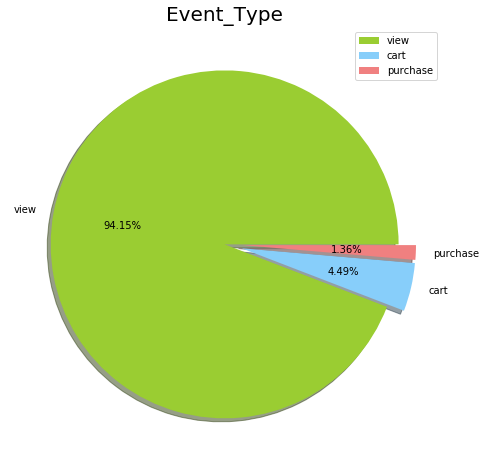

<Figure size 576x576 with 0 Axes>

In [66]:
labels = ['view', 'cart','purchase']
size = data['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
plt.savefig('Event_Type_Dist.png')

#### event_type = "purchase"

In [67]:
purchase = data.loc[data['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
707,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d,2019-11-01
939,2019-11-01 00:06:33 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01
942,2019-11-01 00:06:34 UTC,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47,2019-11-01
1107,2019-11-01 00:07:38 UTC,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1,2019-11-01
...,...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,2019-11-30
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,2019-11-30
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,2019-11-30
67501824,2019-11-30 23:58:57 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,2019-11-30


#### event_type = "cart"

In [68]:
cart = data.loc[data.event_type == 'cart']
cart = cart.dropna(axis='rows')
cart

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
40,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01
502,2019-11-01 00:03:24 UTC,cart,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01
537,2019-11-01 00:03:39 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,2019-11-01
849,2019-11-01 00:05:54 UTC,cart,1002542,2053013555631882655,electronics.smartphone,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01
956,2019-11-01 00:06:38 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,513645631,61ceaf50-820a-4858-9a68-bab804d47a22,2019-11-01
...,...,...,...,...,...,...,...,...,...,...
67501724,2019-11-30 23:58:13 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,2019-11-30
67501756,2019-11-30 23:58:28 UTC,cart,1005132,2053013555631882655,electronics.smartphone,apple,1286.78,566460317,ad056b61-8691-aa65-0fb7-526fc67294f9,2019-11-30
67501778,2019-11-30 23:58:39 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,227.64,555295228,faff950a-a998-4872-8801-693f74c5e55f,2019-11-30
67501812,2019-11-30 23:58:55 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,2019-11-30


#### What brands the customers buy?

In [74]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,198670
apple,165681
xiaomi,57909
huawei,23466
oppo,15080
lg,11828
artel,7269
lenovo,6546
acer,6402


### User Journey example

In [81]:
data.loc[data['user_id'] == 513351129]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
49,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
281,2019-11-01 00:01:57 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,d3ff456e-0537-4c72-b126-752dd3e135db,2019-11-01
57932963,2019-11-25 09:44:42 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933375,2019-11-25 09:44:57 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933966,2019-11-25 09:45:21 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57934030,2019-11-25 09:45:23 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57935200,2019-11-25 09:46:11 UTC,purchase,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
60185950,2019-11-26 16:05:24 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26
60188988,2019-11-26 16:06:54 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26
